In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.colors import ListedColormap

In [82]:
import pandas as pd

encodings_to_try = ['utf-8', 'latin-1', 'cp1252']

file_path = 'spotify-2023.csv'

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(file_path, encoding=encoding, error_bad_lines=False)
        break
    except UnicodeDecodeError:
        print(f"Failed to decode using {encoding} encoding.")

df.head()

Failed to decode using utf-8 encoding.


<ipython-input-82-03d541bab483>:9: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [83]:
missing_values = df.isnull().sum()

missing_values[missing_values>0]

in_shazam_charts    50
key                 95
dtype: int64

In [84]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [85]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')

df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                 float64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists     float64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

In [86]:
sort_by_streams = df.sort_values(by="streams", ascending=False)

top_20_songs = sort_by_streams.head(20)

fig1 = px.bar(top_20_songs, x='track_name', y='streams',
              title='<b>Most Streamed Songs of 2023</b>',
              color='track_name',
              color_continuous_scale = 'viridis',
             hover_name = 'artist(s)_name')

fig1.update_xaxes(categoryorder='total descending')
fig1.update_xaxes(title_text='Track Name')
fig1.update_yaxes(title_text='Total Streams')

fig1.update_layout(width=1500, height=800)

plt.tight_layout()
fig1.show()

<Figure size 640x480 with 0 Axes>

In [87]:
artist_stats = df.groupby('artist(s)_name').agg({'track_name': 'count', 'streams': 'sum'}).reset_index()
artist_stats.columns = ['Artist', 'Number of Songs', 'Total Streams']

artist_stats['Avg Streams per Song'] = (artist_stats['Total Streams'] / artist_stats['Number of Songs']) / 1e9

artist_stats = artist_stats.sort_values(by='Total Streams', ascending=False)

top_20_artists = artist_stats.head(20)

fig1 = px.bar(top_20_artists, x='Artist', y='Total Streams',
              title='<b>Most Streamed Artists of 2023</b>',
              color='Artist',
              color_continuous_scale='viridis')

fig1.update_xaxes(categoryorder='total descending')
fig1.update_xaxes(title_text='Artist')
fig1.update_yaxes(title_text='Total Streams')

fig1.show()

In [88]:
fig2 = px.bar(top_20_artists, x='Artist', y='Number of Songs',
              title='<b>Number of Songs per Artist (Top 20)</b>',
              color='Artist',
              color_continuous_scale='viridis')

fig2.update_xaxes(categoryorder='total descending')
fig2.update_xaxes(title_text='Artist')
fig2.update_yaxes(title_text='Number of Songs')

fig2.show()

In [89]:
fig3 = px.bar(top_20_artists, x='Artist', y='Avg Streams per Song',
              title='<b>Average Streams per Song (Top 20)</b>',
              color='Artist',
              color_continuous_scale='viridis')

fig3.update_xaxes(categoryorder='total descending')
fig3.update_xaxes(title_text='Artist')
fig3.update_yaxes(title_text='Average Streams per Song')


fig3.show()

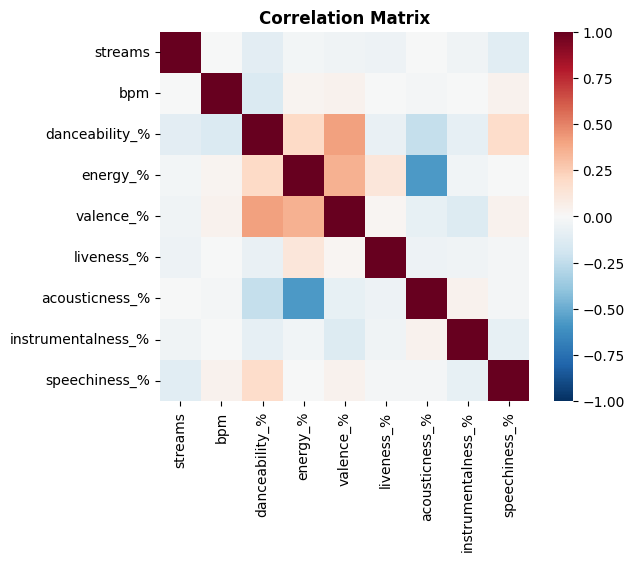

In [90]:
correlate_columns = ['streams','bpm', 'danceability_%','energy_%', 'valence_%',  'liveness_%', 'acousticness_%', 'instrumentalness_%', 'speechiness_%']

correlation_chart = df[correlate_columns].corr()

plt.title('Correlation Matrix', fontweight='bold')

sns.heatmap(correlation_chart,
            annot=False,
            cmap='RdBu_r',
            fmt=".2f",
            vmin=-1,
            vmax=1,
            square=True)

plt.show()

In [91]:
sort_by_streams = df.sort_values(by='streams')

sort_by_streams['track_and_artist'] = sort_by_streams['track_name'] + ' - ' + sort_by_streams['artist(s)_name']

fig = px.scatter(sort_by_streams, x='danceability_%', y='speechiness_%',
                 color='streams',
                 opacity=0.7,
                 color_continuous_scale='plasma',
                 title='<b>Streams vs Danceability vs Speechiness</b>',
                 hover_name = 'track_and_artist')

fig.update_layout(legend_title_text='Streams')

fig.update_xaxes(title_text='Danceability %')
fig.update_yaxes(title_text='Speechiness %')

fig.update_layout(width=1200, height=650)

fig.show()

In [92]:
sort_by_bpm = df.sort_values(by='bpm')

sort_by_bpm['track_and_artist'] = sort_by_bpm['track_name'] + ' - ' + sort_by_bpm['artist(s)_name']

fig = px.scatter(sort_by_bpm, x='danceability_%', y='streams',
                 color='bpm',
                 opacity=0.7,
                 color_continuous_scale='plasma',
                 title='<b>Streams vs Danceability vs BPM</b>',
                 hover_name = 'track_and_artist')

fig.update_layout(legend_title_text='BPM')

fig.update_xaxes(title_text='Danceability %')
fig.update_yaxes(title_text='Streams')

fig.update_layout(width=1200, height=650)

fig.show()

In [93]:
sort_by_valence = df.sort_values(by='valence_%')

sort_by_valence['track_and_artist'] = sort_by_valence['track_name'] + ' - ' + sort_by_valence['artist(s)_name']

fig = px.scatter(sort_by_valence, x='danceability_%', y='energy_%',
                 color='valence_%',
                 opacity=0.7,
                 color_continuous_scale='plasma',
                 title='<b>Danceability vs Energy vs Valence</b>',
                 hover_name = 'track_and_artist')

fig.update_xaxes(title_text='Danceability %')
fig.update_yaxes(title_text='Energy %')

fig.update_layout(width=1200, height=650)

fig.show()

In [94]:
sort_by_acousticness = df.sort_values(by='acousticness_%')

sort_by_acousticness['track_and_artist'] = sort_by_acousticness['track_name'] + ' - ' + sort_by_acousticness['artist(s)_name']

fig = px.scatter(sort_by_acousticness, x='danceability_%', y='energy_%',
                 color='acousticness_%', opacity=0.7,
                 color_continuous_scale='plasma',
                 title='<b>Danceability vs Energy vs Acousticness</b>',
                hover_name = 'track_and_artist')

fig.update_layout(legend_title_text='Acousticness %')

fig.update_xaxes(title_text='Danceability %')
fig.update_yaxes(title_text='Energy %')

fig.update_layout(width=1250, height=650)

fig.show()

Text(0.5, 1.0, 'Key Frequency Chart')

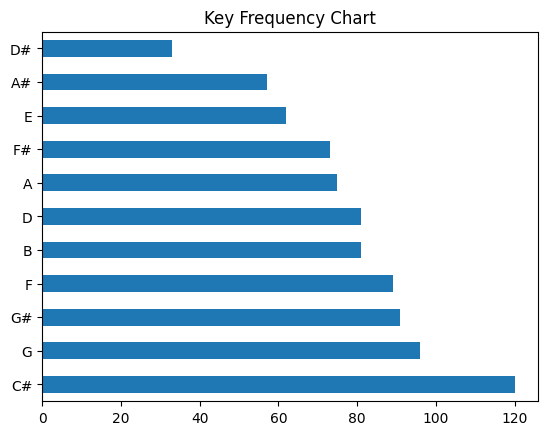

In [95]:
df["key"].value_counts().plot.barh().set_title("Key Frequency Chart")

Text(0.5, 1.0, 'Keys vs Streams')

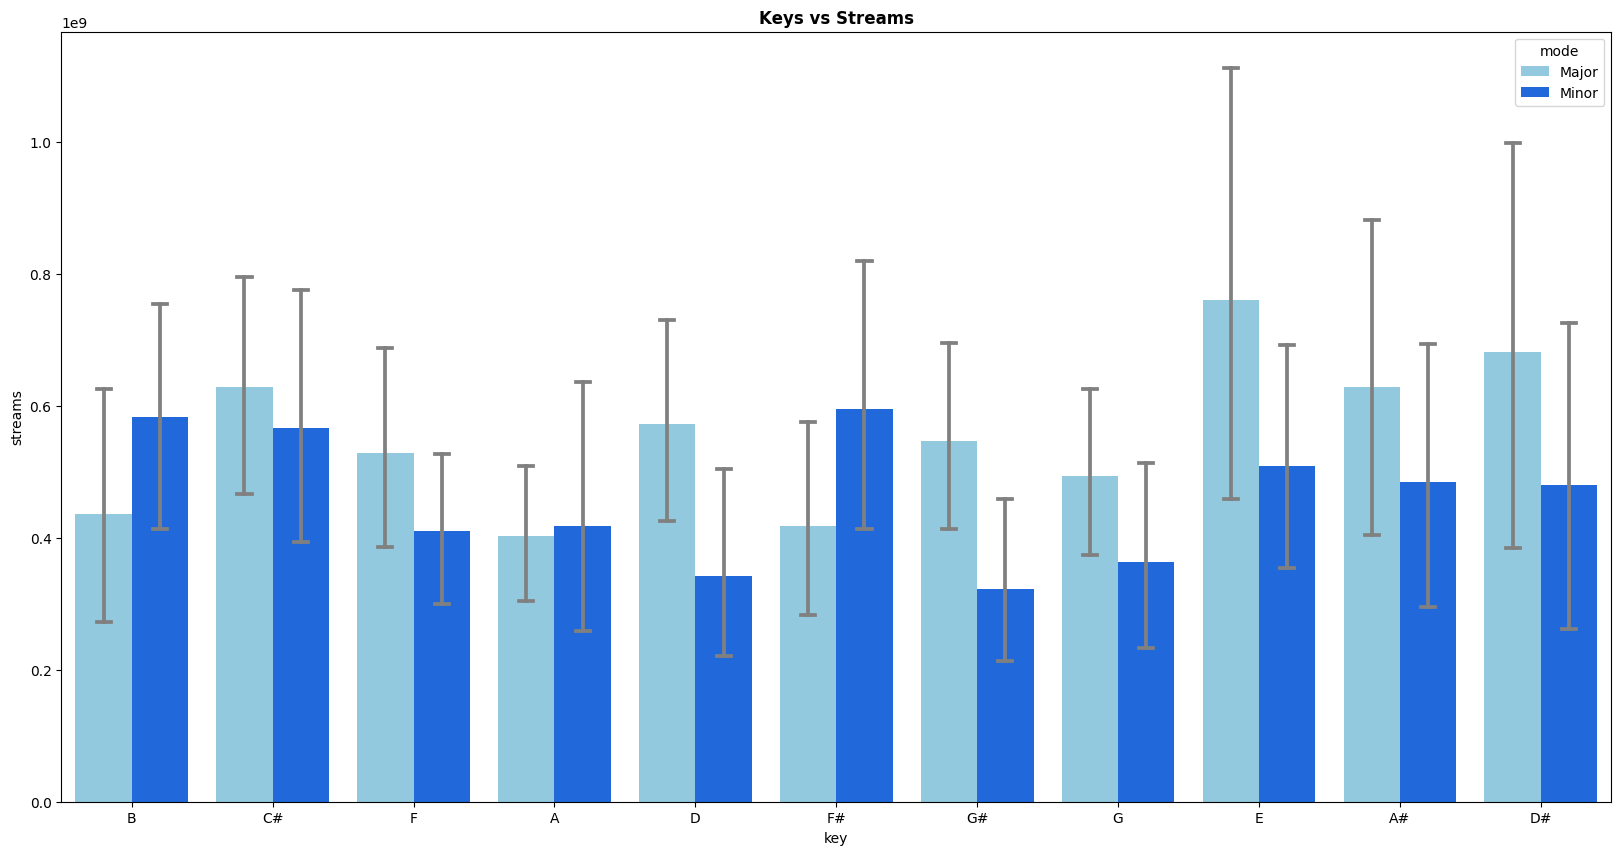

In [96]:
plt.figure(figsize=(20, 10))
sns.barplot(x = "key", y= "streams", hue= "mode", data=df, width=0.8, capsize = 0.1, palette = ['skyblue', '#0261fa'], errcolor = 'grey')
plt.title('Keys vs Streams', fontweight='bold')

In [97]:
def draw_bar(attribute, color):
  plt.figure(figsize=(10, 20))
  g = sns.displot(df[attribute], kde=True, color=color, edgecolor='white')
  x = attribute[:-2].capitalize()
  g.set_axis_labels(x)
  plt.title("Distribution of " + x, fontweight='bold')

<Figure size 1000x2000 with 0 Axes>

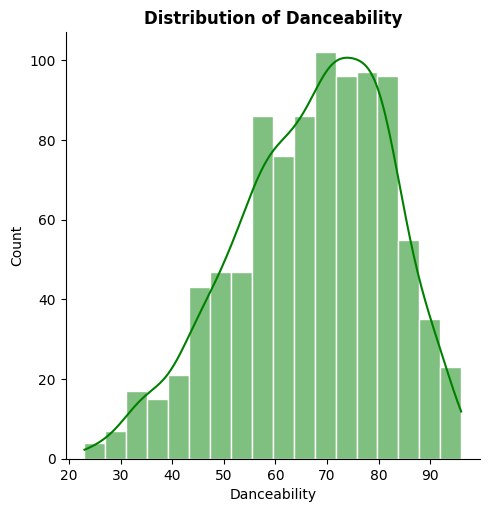

In [98]:
draw_bar('danceability_%', 'green')

<Figure size 1000x2000 with 0 Axes>

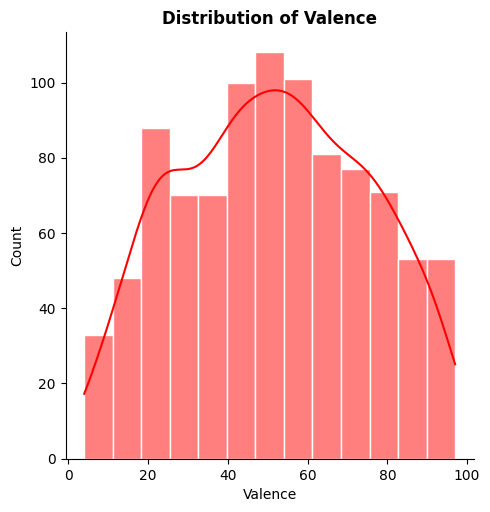

In [99]:
draw_bar('valence_%','red')

<Figure size 1000x2000 with 0 Axes>

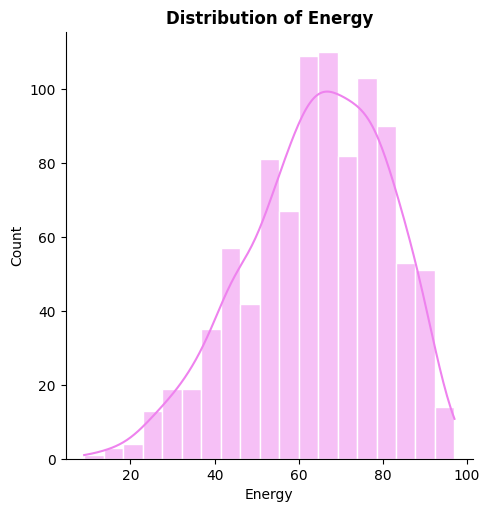

In [100]:
draw_bar('energy_%', 'violet')

<Figure size 1000x2000 with 0 Axes>

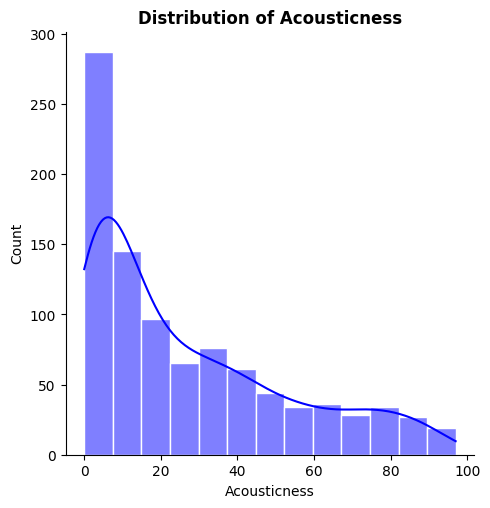

In [101]:
draw_bar('acousticness_%', 'blue')

<Figure size 1000x2000 with 0 Axes>

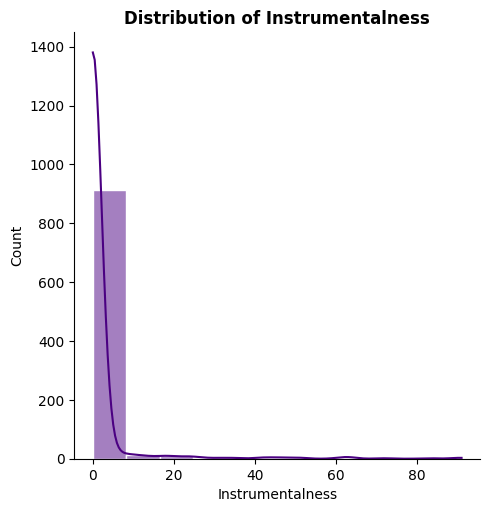

In [102]:
draw_bar('instrumentalness_%', 'indigo')

<Figure size 1000x2000 with 0 Axes>

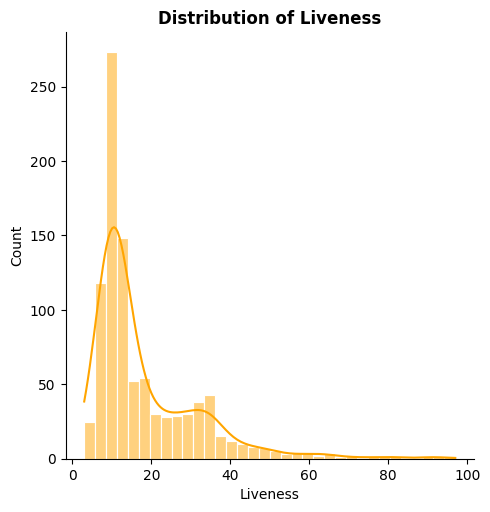

In [103]:
draw_bar('liveness_%','orange')

<Figure size 1000x2000 with 0 Axes>

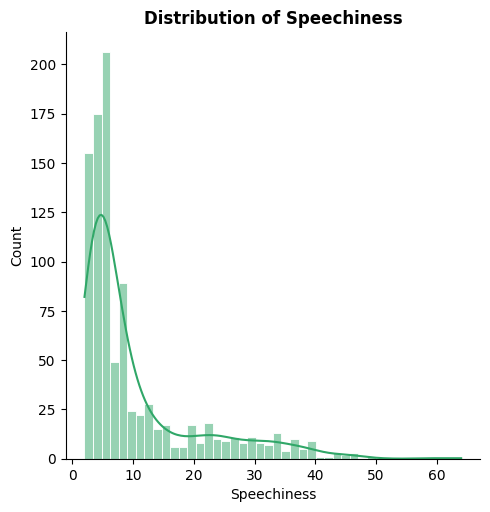

In [104]:
draw_bar('speechiness_%', 	'#30a768')

<Axes: title={'center': 'Total number of streams by year released'}, xlabel='released_year', ylabel='streams'>

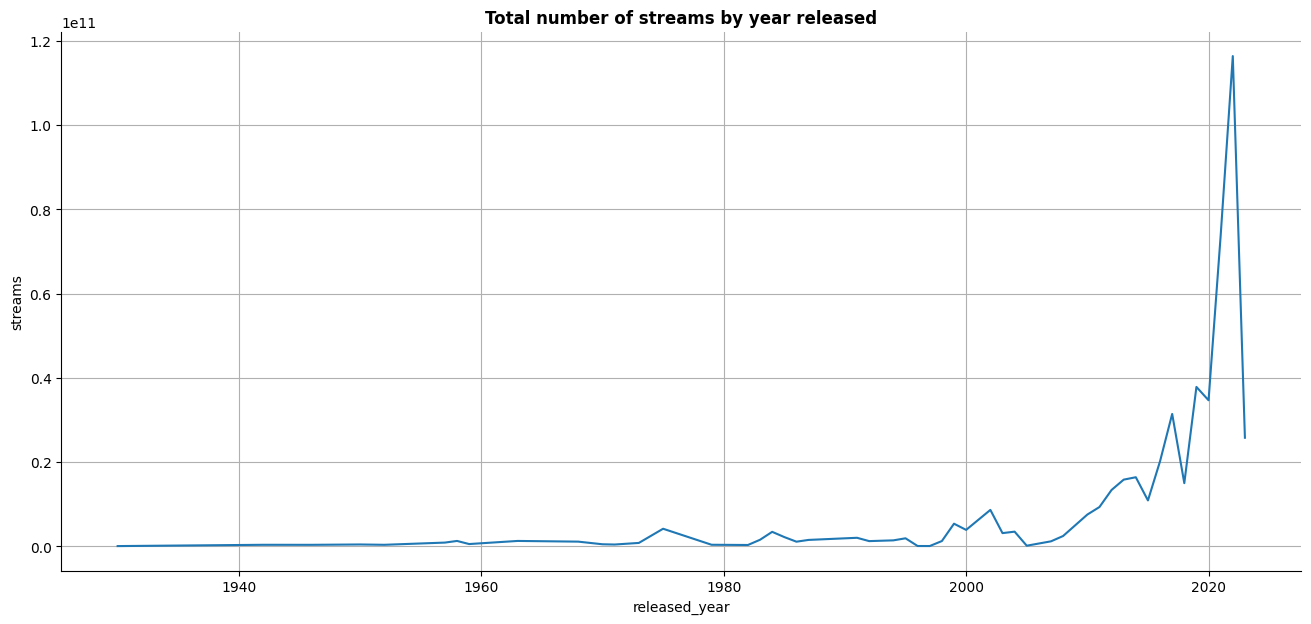

In [105]:
df_year = df.groupby("released_year")["streams"].agg("sum")

plt.figure(figsize=(16, 7))
plt.title("Total number of streams by year released", fontweight='bold')
plt.grid(True)
ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

sns.lineplot(data=df_year)

Text(0.5, 1.0, 'Correlation Matrix')

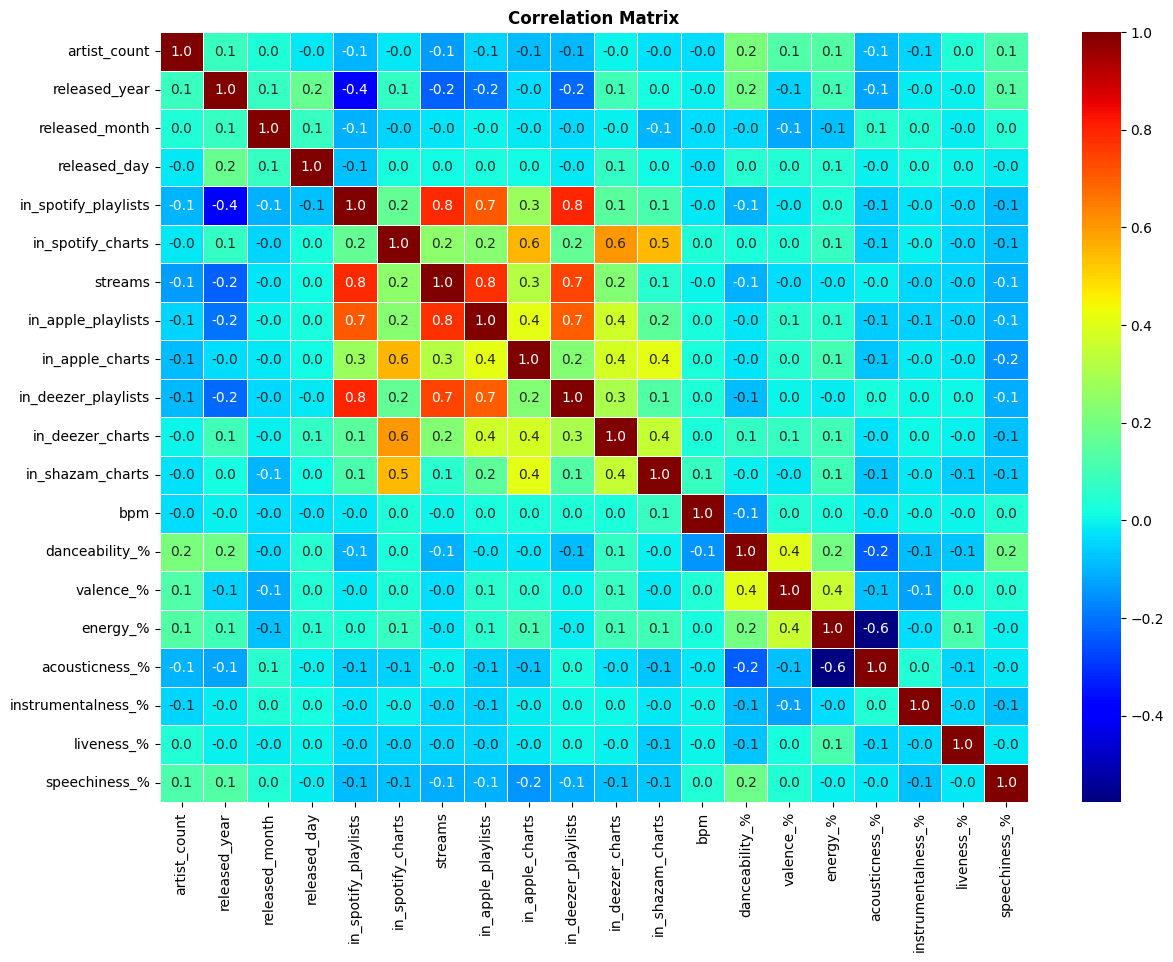

In [106]:
numerical = df.select_dtypes(include=['number'])

plt.figure(figsize=(14,10))
sns.heatmap(numerical.corr(), annot=True, cmap="jet", fmt='.1f', linewidths=0.5)
plt.title("Correlation Matrix", fontweight='bold')